In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from IPython.display import Javascript
import getpass

In [2]:
password = None
if password is None:
    password = getpass.getpass()

In [3]:
!echo $password | sudo -S mount -t tmpfs -o size=20g tmpfs /mnt/tmpfs/
!head -c 20G /dev/urandom >  /mnt/tmpfs/data

[sudo] password for fbdtemme: mount: /mnt/tmpfs/: mount point does not exist.
/bin/bash: /mnt/tmpfs/data: No such file or directory


In [4]:
pwd = "/mnt/tmpfs"
max_threads = 4
iterations = 3
target = 'data'

In [5]:
fs = !du -b $pwd/$target | grep -o "[0-9]*"
file_size = int(fs[0])

In [6]:
file_size

14434222180

In [7]:
# Disable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g performance

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


In [8]:
def parse_real_time(data: str):
    results = []
    match = re.search(R"real\s(\d+)m([\d.]+)s", data)
    minutes = float(match.group(1))
    seconds = float(match.group(2))
    return minutes * 60 + seconds

def parse_real_time_sequence(data: str):
    results = []
    for match in re.findall(R"real\s(\d+)m([\d.]+)s", data):
        print(match[0])
        print(match[1])
        minutes = float(match[0])
        seconds = float(match[1])
        results.append(minutes * 60 + seconds)
    return results

In [9]:
data = {}

In [10]:
def run_benchmark(name: str, use_threads:bool = True):
    duration = np.ndarray(shape=(iterations, max_threads))
    
    if use_threads:
        for t in range(1, max_threads+1):
            for i in range(0, iterations):
                result = !./benchmark.sh "{name}" "{pwd}" "{target}" "{t}"
                result_str = '\n'.join(result)
                print(f"-- iteration {i+1} | threads {t}\n{result_str}")
                duration[i, t-1] = parse_real_time(result_str)
    else:
        for i in range(0, iterations):
            t = 1
            result = !./benchmark.sh "{name}" "{pwd}" "{target}" "{t}"
            result_str = '\n'.join(result)
            print(f"-- iteration {i+1} | threads {t}\n{result_str}")
            duration[i, :] = parse_real_time(result_str)

    speed = file_size / duration
    mean = np.mean(speed, axis=0)
    std  = np.std(speed, axis=0)
    return (mean, std)

### mktorrent

In [11]:
mktorrent_data = run_benchmark("mktorrent")

-- iteration 1 | threads 1
rm: cannot remove '*.torrent': No such file or directory

real	1m42.299s
user	0m19.691s
sys	0m15.973s

-- iteration 2 | threads 1

real	0m16.782s
user	0m16.754s
sys	0m3.389s

-- iteration 3 | threads 1

real	0m16.725s
user	0m16.751s
sys	0m3.279s

-- iteration 4 | threads 1

real	0m18.309s
user	0m18.152s
sys	0m4.676s

-- iteration 5 | threads 1

real	0m16.833s
user	0m16.925s
sys	0m3.426s

-- iteration 1 | threads 2

real	0m10.278s
user	0m19.694s
sys	0m4.733s

-- iteration 2 | threads 2

real	0m8.918s
user	0m17.677s
sys	0m3.766s

-- iteration 3 | threads 2

real	0m9.313s
user	0m18.318s
sys	0m3.836s

-- iteration 4 | threads 2

real	0m8.921s
user	0m17.613s
sys	0m3.857s

-- iteration 5 | threads 2

real	0m10.357s
user	0m20.122s
sys	0m4.491s

-- iteration 1 | threads 3

real	0m6.264s
user	0m18.505s
sys	0m3.343s

-- iteration 2 | threads 3

real	0m5.751s
user	0m17.112s
sys	0m3.119s

-- iteration 3 | threads 3

real	0m5.781s
user	0m17.201s
sys	0m3.098s

-- iteration

In [25]:
torrenttools_openssl_data = run_benchmark("torrenttools_openssl")

-- iteration 1 | threads 1

real	0m18.042s
user	0m18.146s
sys	0m3.837s

-- iteration 2 | threads 1

real	0m18.028s
user	0m18.438s
sys	0m3.787s

-- iteration 3 | threads 1

real	0m19.028s
user	0m18.968s
sys	0m4.658s

-- iteration 4 | threads 1

real	0m19.028s
user	0m19.017s
sys	0m5.051s

-- iteration 5 | threads 1

real	0m18.028s
user	0m17.878s
sys	0m3.447s

-- iteration 1 | threads 2

real	0m10.030s
user	0m19.519s
sys	0m4.700s

-- iteration 2 | threads 2

real	0m11.031s
user	0m20.477s
sys	0m5.767s

-- iteration 3 | threads 2

real	0m10.033s
user	0m19.127s
sys	0m4.142s

-- iteration 4 | threads 2

real	0m9.027s
user	0m17.850s
sys	0m3.321s

-- iteration 5 | threads 2

real	0m9.027s
user	0m18.058s
sys	0m3.374s

-- iteration 1 | threads 3

real	0m7.038s
user	0m18.055s
sys	0m3.131s

-- iteration 2 | threads 3

real	0m7.027s
user	0m18.017s
sys	0m2.990s

-- iteration 3 | threads 3

real	0m7.039s
user	0m19.703s
sys	0m3.673s

-- iteration 4 | threads 3

real	0m7.037s
user	0m18.695s
sys	0m3.137s

In [13]:
torrenttools_isal_data = run_benchmark("torrenttools_isal")

-- iteration 1 | threads 1
rm: cannot remove '*.torrent': No such file or directory

real	0m7.041s
user	0m5.963s
sys	0m2.874s

-- iteration 2 | threads 1

real	0m6.029s
user	0m5.805s
sys	0m2.799s

-- iteration 3 | threads 1

real	0m7.033s
user	0m6.097s
sys	0m2.981s

-- iteration 4 | threads 1

real	0m7.034s
user	0m6.383s
sys	0m3.223s

-- iteration 5 | threads 1

real	0m8.033s
user	0m7.169s
sys	0m3.803s

-- iteration 1 | threads 2

real	0m5.043s
user	0m7.822s
sys	0m3.819s

-- iteration 2 | threads 2

real	0m6.039s
user	0m9.834s
sys	0m4.846s

-- iteration 3 | threads 2

real	0m5.034s
user	0m8.334s
sys	0m3.979s

-- iteration 4 | threads 2

real	0m4.036s
user	0m6.796s
sys	0m3.287s

-- iteration 5 | threads 2

real	0m4.038s
user	0m6.286s
sys	0m3.018s

-- iteration 1 | threads 3

real	0m4.047s
user	0m7.989s
sys	0m3.267s

-- iteration 2 | threads 3

real	0m4.045s
user	0m8.100s
sys	0m3.439s

-- iteration 3 | threads 3

real	0m4.042s
user	0m8.029s
sys	0m3.441s

-- iteration 4 | threads 3

real	

In [14]:
imdl_data = run_benchmark("imdl", use_threads=False)

-- iteration 1 | threads 1

real	0m33.166s
user	0m29.894s
sys	0m2.915s

-- iteration 2 | threads 1

real	0m33.501s
user	0m30.199s
sys	0m2.974s

-- iteration 3 | threads 1

real	0m33.838s
user	0m30.267s
sys	0m3.186s

-- iteration 4 | threads 1

real	0m32.984s
user	0m29.755s
sys	0m2.900s

-- iteration 5 | threads 1

real	0m33.519s
user	0m30.071s
sys	0m3.067s



In [15]:
dottorrent_cli_data = run_benchmark("dottorrent-cli", use_threads=False)

-- iteration 1 | threads 1

real	0m25.815s
user	0m21.262s
sys	0m4.181s

-- iteration 2 | threads 1

real	0m26.171s
user	0m21.538s
sys	0m4.305s

-- iteration 3 | threads 1

real	0m28.089s
user	0m22.910s
sys	0m4.787s

-- iteration 4 | threads 1

real	0m27.079s
user	0m22.233s
sys	0m4.519s

-- iteration 5 | threads 1

real	0m24.938s
user	0m20.832s
sys	0m3.838s



In [16]:
pyrocore_data = run_benchmark("pyrocore", use_threads=False)

-- iteration 1 | threads 1

real	0m21.018s
user	0m17.365s
sys	0m3.316s

-- iteration 2 | threads 1

real	0m20.142s
user	0m16.925s
sys	0m2.965s

-- iteration 3 | threads 1

real	0m22.108s
user	0m17.984s
sys	0m3.787s

-- iteration 4 | threads 1

real	0m18.467s
user	0m15.825s
sys	0m2.480s

-- iteration 5 | threads 1

real	0m19.917s
user	0m16.833s
sys	0m2.828s



In [17]:
transmission_create_data = run_benchmark("transmission-create", use_threads=False)

-- iteration 1 | threads 1

real	0m20.511s
user	0m17.136s
sys	0m2.978s

-- iteration 2 | threads 1

real	0m19.505s
user	0m16.669s
sys	0m2.564s

-- iteration 3 | threads 1

real	0m21.005s
user	0m17.300s
sys	0m3.056s

-- iteration 4 | threads 1

real	0m21.008s
user	0m17.393s
sys	0m3.006s

-- iteration 5 | threads 1

real	0m19.506s
user	0m16.642s
sys	0m2.502s



In [18]:
py3createtorrent_data = run_benchmark("py3createtorrent", use_threads=False)

-- iteration 1 | threads 1

real	0m27.608s
user	0m22.329s
sys	0m4.939s

-- iteration 2 | threads 1

real	0m28.524s
user	0m23.064s
sys	0m5.098s

-- iteration 3 | threads 1

real	0m25.940s
user	0m21.144s
sys	0m4.504s

-- iteration 4 | threads 1

real	0m26.758s
user	0m21.608s
sys	0m4.849s

-- iteration 5 | threads 1

real	0m25.787s
user	0m21.076s
sys	0m4.462s



In [19]:
torf_data = run_benchmark("torf-cli")

-- iteration 1 | threads 1

real	0m20.974s
user	0m17.728s
sys	0m9.254s

-- iteration 2 | threads 1

real	0m19.678s
user	0m17.780s
sys	0m7.998s

-- iteration 3 | threads 1

real	0m18.850s
user	0m17.723s
sys	0m8.369s

-- iteration 4 | threads 1

real	0m18.233s
user	0m17.352s
sys	0m7.972s

-- iteration 5 | threads 1

real	0m20.071s
user	0m19.075s
sys	0m8.850s

-- iteration 1 | threads 2

real	0m10.758s
user	0m18.297s
sys	0m8.409s

-- iteration 2 | threads 2

real	0m10.687s
user	0m17.996s
sys	0m8.546s

-- iteration 3 | threads 2

real	0m11.226s
user	0m17.730s
sys	0m8.128s

-- iteration 4 | threads 2

real	0m10.915s
user	0m18.008s
sys	0m7.695s

-- iteration 5 | threads 2

real	0m11.749s
user	0m19.220s
sys	0m9.315s

-- iteration 1 | threads 3

real	0m10.549s
user	0m19.762s
sys	0m9.363s

-- iteration 2 | threads 3

real	0m12.001s
user	0m21.849s
sys	0m10.731s

-- iteration 3 | threads 3

real	0m10.888s
user	0m20.776s
sys	0m9.774s

-- iteration 4 | threads 3

real	0m9.625s
user	0m18.123s
sys	0m

In [27]:
benchmark_data = {
    "mktorrent": mktorrent_data, 
    "imdl": imdl_data,
    "dottorrent-cli": dottorrent_cli_data,
    "pyrocore": pyrocore_data,
    "transmission-create": transmission_create_data,
    "py3createtorrent" : py3createtorrent_data,
    "torf-cli": torf_data,
    "torrenttools (OpenSSL)": torrenttools_openssl_data,
    "torrenttools (ISA-L)": torrenttools_isal_data,
}

In [28]:
programs = list(benchmark_data.keys())
threads = list(range(1, max_threads+1))
index = pd.MultiIndex.from_product((threads, programs), names=["threads", "programs"])

speed_mean_data = {}
speed_stddev_data = {}
for program, data in benchmark_data.items():
    speed_mean_data[program] = data[0]
    speed_stddev_data[program] = data[1]
    

speed_mean = pd.DataFrame(speed_mean_data).stack()
speed_stddev = pd.DataFrame(speed_stddev_data).stack()

In [29]:
df = pd.DataFrame()
df["speed_mean"], df["speed_stddev"] = speed_mean / 1e6, speed_stddev / 1e6
df.index = index

In [30]:
# df.to_csv("benchmark.csv")
# df = pd.read_csv("benchmark.csv", header=1)
# df

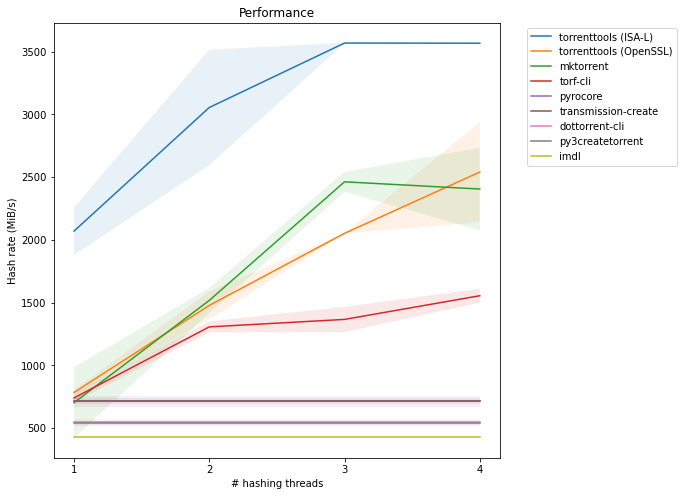

In [31]:
import matplotlib.cm
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

programs = df.index.unique(level=1)
threads = df.index.unique(level=0)
programs_by_max_speed = {}

for program in programs:
    sm = df.loc[df.index.get_level_values(1) == program, "speed_mean"]
    programs_by_max_speed[program] = np.max(sm)

sorted_programs = sorted(programs_by_max_speed.keys(), key=lambda x : programs_by_max_speed[x], reverse=True)

for idx, program in enumerate(sorted_programs):
    sm = df.loc[df.index.get_level_values(1) == program, "speed_mean"]
    sd = df.loc[df.index.get_level_values(1) == program, "speed_stddev"]
    ax.plot(threads, sm)
    ax.fill_between(threads, sm - sd, sm + sd, alpha=0.1)

ax.set_title("Performance")
ax.set_xlabel("# hashing threads")
ax.set_ylabel("Hash rate (MiB/s)")
ax.set_xticks(list(range(1, max_threads+1)))
ax.legend(sorted_programs, bbox_to_anchor=(1.05, 1), loc='upper left')